# NLP Preprocessing: News Classification

## Overview
In this assignment, we will be working with the 20 newsgroups dataset to perform text preprocessing, vectorization, and classification tasks. We will explore different preprocessing techniques, vectorization methods, and classification algorithms to understand their impact on news article classification performance.


## Part 1: Data Exploration

We will start by loading the 20 newsgroups dataset and exploring its structure and characteristics.


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from collections import Counter

# Setting up plotting style
plt.style.use('default')
sns.set_palette("husl")


In [2]:
# Loading the 20 newsgroups dataset with 5 specific categories
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian', 'talk.politics.guns']
category_mapping = {
    'alt.atheism': 'Entertainment',
    'comp.graphics': 'Tech', 
    'sci.med': 'Tech',
    'soc.religion.christian': 'Politics',
    'talk.politics.guns': 'Politics'
}

# Fetching training and test data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

print("Dataset loaded successfully!")
print(f"Training samples: {len(newsgroups_train.data)}")
print(f"Test samples: {len(newsgroups_test.data)}")
print(f"Categories: {len(newsgroups_train.target_names)}")


Dataset loaded successfully!
Training samples: 2803
Test samples: 1866
Categories: 5


In [3]:
# Displaying basic statistics of the dataset
print("=== Dataset Statistics ===")
print(f"Total training articles: {len(newsgroups_train.data)}")
print(f"Total test articles: {len(newsgroups_test.data)}")
print(f"Number of categories: {len(newsgroups_train.target_names)}")
print(f"Category names: {newsgroups_train.target_names}")

# Calculating article lengths
train_lengths = [len(article.split()) for article in newsgroups_train.data]
test_lengths = [len(article.split()) for article in newsgroups_test.data]

print(f"\nTraining set article length statistics:")
print(f"Mean: {np.mean(train_lengths):.2f} words")
print(f"Median: {np.median(train_lengths):.2f} words")
print(f"Min: {np.min(train_lengths)} words")
print(f"Max: {np.max(train_lengths)} words")


=== Dataset Statistics ===
Total training articles: 2803
Total test articles: 1866
Number of categories: 5
Category names: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian', 'talk.politics.guns']

Training set article length statistics:
Mean: 206.26 words
Median: 96.00 words
Min: 0 words
Max: 9109 words


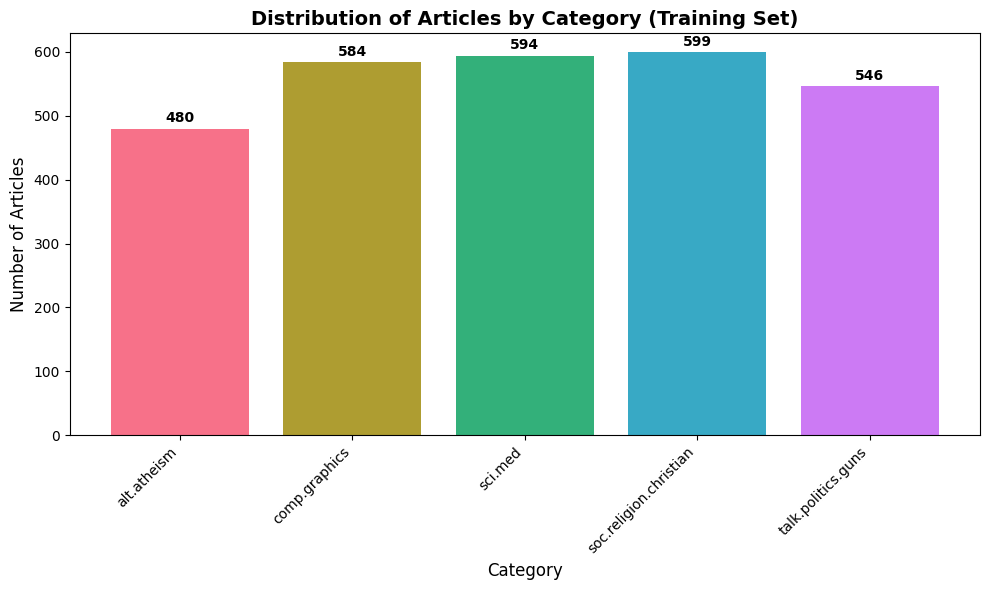

In [4]:
# Visualizing article distribution by category
train_category_counts = Counter(newsgroups_train.target)
category_names = [newsgroups_train.target_names[i] for i in range(len(newsgroups_train.target_names))]
category_counts = [train_category_counts[i] for i in range(len(newsgroups_train.target_names))]

plt.figure(figsize=(10, 6))
bars = plt.bar(category_names, category_counts, color=sns.color_palette("husl", len(category_names)))
plt.title('Distribution of Articles by Category (Training Set)', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adding value labels on bars
for bar, count in zip(bars, category_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [5]:
# Displaying sample articles from each category
print("=== Sample Articles from Each Category ===\n")

for i, category in enumerate(newsgroups_train.target_names):
    # Finding first article from this category
    category_indices = [idx for idx, target in enumerate(newsgroups_train.target) if target == i]
    
    if category_indices:
        sample_article = newsgroups_train.data[category_indices[0]]
        print(f"Category: {category}")
        print(f"Article length: {len(sample_article.split())} words")
        print(f"Sample text (first 200 characters):")
        print(f"{sample_article[:200]}...")
        print("-" * 80)


=== Sample Articles from Each Category ===

Category: alt.atheism
Article length: 1 words
Sample text (first 200 characters):
 
(Deletion)
 ...
--------------------------------------------------------------------------------
Category: comp.graphics
Article length: 87 words
Sample text (first 200 characters):

There was a very useful article in one of the 1989 issues of
Transactions On Graphics. I believe Maureen Stone was one of
the authors. Sorry not to be more specific. I don't have the
reference here w...
--------------------------------------------------------------------------------
Category: sci.med
Article length: 77 words
Sample text (first 200 characters):


30mg per day of propranolol is a homeopathic dose in migraine. 
If you got fatigued at that level, it is unlikely that you will
tolerate enough beta blocker to help you.  

Probably a single nightim...
--------------------------------------------------------------------------------
Category: soc.religion.christian
Article 

## Part 2: Text Preprocessing

We will create and compare two preprocessing pipelines to understand their impact on vocabulary size and processing time.


In [6]:
# Importing additional libraries for text preprocessing
import re
import time
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag

# Downloading required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("NLTK resources downloaded successfully!")


NLTK resources downloaded successfully!


In [7]:
# Defining the basic preprocessing pipeline
def basic_preprocessing(text):
    """
    Basic preprocessing: tokenization + lowercasing + stop word removal
    """
    # Converting to lowercase
    text = text.lower()
    
    # Removing punctuation and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenizing
    tokens = word_tokenize(text)
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    
    return tokens

print("Basic preprocessing pipeline defined successfully!")


Basic preprocessing pipeline defined successfully!


In [8]:
# Defining the advanced preprocessing pipeline
def advanced_preprocessing(text):
    """
    Advanced preprocessing: Basic + stemming + lemmatization + POS filtering
    """
    # Applying basic preprocessing first
    tokens = basic_preprocessing(text)
    
    # Initializing stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    # POS tagging for better lemmatization
    pos_tags = pos_tag(tokens)
    
    # Filtering for nouns, verbs, adjectives, and adverbs only
    relevant_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS'}
    filtered_tokens = [token for token, pos in pos_tags if pos in relevant_pos]
    
    # Applying stemming and lemmatization
    processed_tokens = []
    for token in filtered_tokens:
        # Stemming
        stemmed = stemmer.stem(token)
        # Lemmatization
        lemmatized = lemmatizer.lemmatize(stemmed)
        processed_tokens.append(lemmatized)
    
    return processed_tokens

print("Advanced preprocessing pipeline defined successfully!")


Advanced preprocessing pipeline defined successfully!


In [9]:
# Processing a subset of documents for comparison
sample_size = 500  # Using subset for faster processing
sample_documents = newsgroups_train.data[:sample_size]

print(f"Processing {sample_size} documents with both pipelines...")

# Processing with basic pipeline
start_time = time.time()
basic_processed = []
basic_vocabulary = set()

for doc in sample_documents:
    tokens = basic_preprocessing(doc)
    basic_processed.append(tokens)
    basic_vocabulary.update(tokens)

basic_time = time.time() - start_time
print(f"Basic preprocessing completed in {basic_time:.2f} seconds")


Processing 500 documents with both pipelines...
Basic preprocessing completed in 0.22 seconds


In [10]:
# Processing with advanced pipeline
start_time = time.time()
advanced_processed = []
advanced_vocabulary = set()

for doc in sample_documents:
    tokens = advanced_preprocessing(doc)
    advanced_processed.append(tokens)
    advanced_vocabulary.update(tokens)

advanced_time = time.time() - start_time
print(f"Advanced preprocessing completed in {advanced_time:.2f} seconds")


Advanced preprocessing completed in 2.60 seconds


In [11]:
# Comparing preprocessing results
print("=== Preprocessing Comparison Results ===")
print(f"Sample size: {sample_size} documents")
print(f"\nBasic Pipeline:")
print(f"  - Vocabulary size: {len(basic_vocabulary):,} unique words")
print(f"  - Processing time: {basic_time:.2f} seconds")
print(f"  - Average time per document: {basic_time/sample_size:.4f} seconds")

print(f"\nAdvanced Pipeline:")
print(f"  - Vocabulary size: {len(advanced_vocabulary):,} unique words")
print(f"  - Processing time: {advanced_time:.2f} seconds")
print(f"  - Average time per document: {advanced_time/sample_size:.4f} seconds")

print(f"\nComparison:")
vocab_reduction = ((len(basic_vocabulary) - len(advanced_vocabulary)) / len(basic_vocabulary)) * 100
time_increase = ((advanced_time - basic_time) / basic_time) * 100
print(f"  - Vocabulary reduction: {vocab_reduction:.1f}%")
print(f"  - Processing time increase: {time_increase:.1f}%")


=== Preprocessing Comparison Results ===
Sample size: 500 documents

Basic Pipeline:
  - Vocabulary size: 10,883 unique words
  - Processing time: 0.22 seconds
  - Average time per document: 0.0004 seconds

Advanced Pipeline:
  - Vocabulary size: 7,603 unique words
  - Processing time: 2.60 seconds
  - Average time per document: 0.0052 seconds

Comparison:
  - Vocabulary reduction: 30.1%
  - Processing time increase: 1065.0%


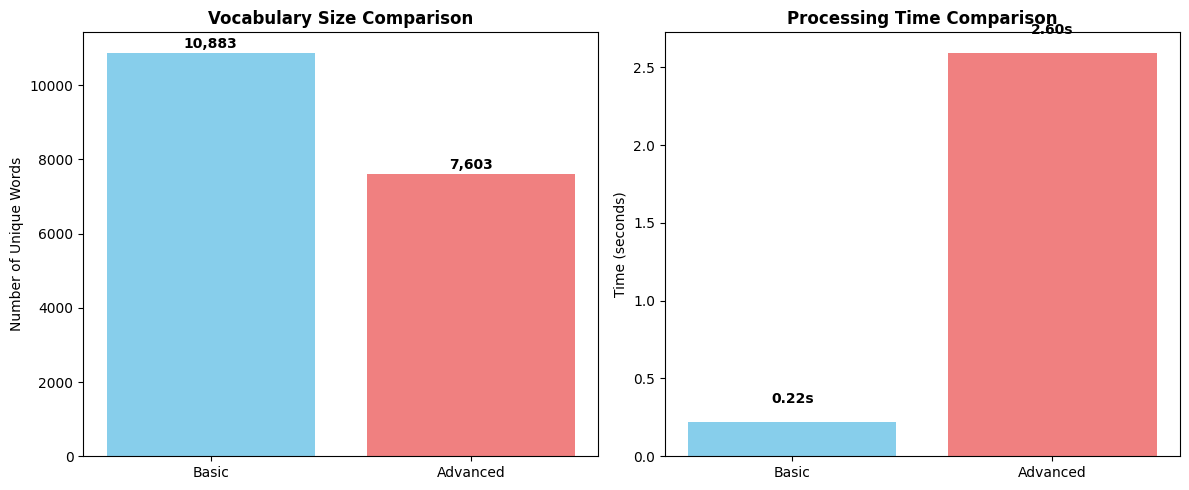

In [12]:
# Visualizing the comparison
comparison_data = {
    'Pipeline': ['Basic', 'Advanced'],
    'Vocabulary Size': [len(basic_vocabulary), len(advanced_vocabulary)],
    'Processing Time (s)': [basic_time, advanced_time]
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Vocabulary size comparison
ax1.bar(comparison_data['Pipeline'], comparison_data['Vocabulary Size'], 
        color=['skyblue', 'lightcoral'])
ax1.set_title('Vocabulary Size Comparison', fontweight='bold')
ax1.set_ylabel('Number of Unique Words')
for i, v in enumerate(comparison_data['Vocabulary Size']):
    ax1.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Processing time comparison
ax2.bar(comparison_data['Pipeline'], comparison_data['Processing Time (s)'], 
        color=['skyblue', 'lightcoral'])
ax2.set_title('Processing Time Comparison', fontweight='bold')
ax2.set_ylabel('Time (seconds)')
for i, v in enumerate(comparison_data['Processing Time (s)']):
    ax2.text(i, v + 0.1, f'{v:.2f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [13]:
# Demonstrating preprocessing on a sample text
sample_text = newsgroups_train.data[0]
print("=== Sample Text Preprocessing Demonstration ===")
print(f"Original text (first 200 characters):")
print(f"{sample_text[:200]}...")
print(f"\nOriginal length: {len(sample_text.split())} words")

print(f"\nBasic preprocessing result:")
basic_result = basic_preprocessing(sample_text)
print(f"Tokens: {basic_result[:15]}...")  # Show first 15 tokens
print(f"Processed length: {len(basic_result)} words")

print(f"\nAdvanced preprocessing result:")
advanced_result = advanced_preprocessing(sample_text)
print(f"Tokens: {advanced_result[:15]}...")  # Show first 15 tokens
print(f"Processed length: {len(advanced_result)} words")


=== Sample Text Preprocessing Demonstration ===
Original text (first 200 characters):
Here is a press release from the White House.

 President Clinton's Remarks On Waco With Q/A
 To: National Desk
 Contact: White House Office of the Press Secretary, 202-456-2100

   WASHINGTON, April ...

Original length: 813 words

Basic preprocessing result:
Tokens: ['press', 'release', 'white', 'house', 'president', 'clintons', 'remarks', 'waco', 'national', 'desk', 'contact', 'white', 'house', 'office', 'press']...
Processed length: 344 words

Advanced preprocessing result:
Tokens: ['press', 'releas', 'white', 'hous', 'presid', 'clinton', 'remark', 'waco', 'nation', 'desk', 'contact', 'white', 'hous', 'offic', 'press']...
Processed length: 311 words


## Part 3: Text Vectorization

We will implement and compare three different text vectorization methods: Bag of Words, TF-IDF, and Word2Vec to understand their characteristics and performance.


In [17]:
# Importing additional libraries for vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Preparing preprocessed text for vectorization
def prepare_text_for_vectorization(documents, use_advanced=False):
    """
    Preparing documents for vectorization by joining tokens back to strings
    """
    processed_docs = []
    for doc in documents:
        if use_advanced:
            tokens = advanced_preprocessing(doc)
        else:
            tokens = basic_preprocessing(doc)
        processed_docs.append(' '.join(tokens))
    return processed_docs

print("Vectorization libraries imported successfully!")


Vectorization libraries imported successfully!


In [18]:
# Preparing data for vectorization (using a subset for efficiency)
vectorization_size = 1000
train_docs = newsgroups_train.data[:vectorization_size]
train_labels = newsgroups_train.target[:vectorization_size]

# Preparing preprocessed versions
train_docs_basic = prepare_text_for_vectorization(train_docs, use_advanced=False)
train_docs_advanced = prepare_text_for_vectorization(train_docs, use_advanced=True)

print(f"Prepared {vectorization_size} documents for vectorization")
print(f"Using basic preprocessing for initial comparison")


Prepared 1000 documents for vectorization
Using basic preprocessing for initial comparison


In [19]:
# Implementing Bag of Words (CountVectorizer)
print("=== Bag of Words Vectorization ===")

bow_vectorizer = CountVectorizer(max_features=5000, min_df=2, max_df=0.8)
start_time = time.time()
bow_features = bow_vectorizer.fit_transform(train_docs_basic)
bow_time = time.time() - start_time

print(f"BoW completed in {bow_time:.2f} seconds")
print(f"BoW feature matrix shape: {bow_features.shape}")
print(f"BoW vocabulary size: {len(bow_vectorizer.vocabulary_)}")
print(f"BoW sparsity: {(1 - bow_features.nnz / (bow_features.shape[0] * bow_features.shape[1])) * 100:.2f}%")


=== Bag of Words Vectorization ===
BoW completed in 0.06 seconds
BoW feature matrix shape: (1000, 5000)
BoW vocabulary size: 5000
BoW sparsity: 98.81%


In [20]:
# Implementing TF-IDF Vectorization
print("=== TF-IDF Vectorization ===")

tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.8)
start_time = time.time()
tfidf_features = tfidf_vectorizer.fit_transform(train_docs_basic)
tfidf_time = time.time() - start_time

print(f"TF-IDF completed in {tfidf_time:.2f} seconds")
print(f"TF-IDF feature matrix shape: {tfidf_features.shape}")
print(f"TF-IDF vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"TF-IDF sparsity: {(1 - tfidf_features.nnz / (tfidf_features.shape[0] * tfidf_features.shape[1])) * 100:.2f}%")


=== TF-IDF Vectorization ===
TF-IDF completed in 0.06 seconds
TF-IDF feature matrix shape: (1000, 5000)
TF-IDF vocabulary size: 5000
TF-IDF sparsity: 98.81%


In [21]:
# Preparing tokenized documents for Word2Vec
tokenized_docs = []
for doc in train_docs:
    tokens = basic_preprocessing(doc)
    if len(tokens) > 0:  # Only add non-empty documents
        tokenized_docs.append(tokens)

print(f"Prepared {len(tokenized_docs)} tokenized documents for Word2Vec training")


Prepared 973 tokenized documents for Word2Vec training


In [22]:
# Implementing Word2Vec - CBOW model
print("=== Word2Vec CBOW Vectorization ===")

start_time = time.time()
w2v_cbow = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, 
                    workers=4, sg=0, epochs=10)  # sg=0 for CBOW
cbow_time = time.time() - start_time

print(f"Word2Vec CBOW training completed in {cbow_time:.2f} seconds")
print(f"CBOW vocabulary size: {len(w2v_cbow.wv.key_to_index)}")
print(f"CBOW vector dimensions: {w2v_cbow.vector_size}")

# Creating document vectors by averaging word vectors
def get_document_vector(model, tokens):
    """Getting document vector by averaging word vectors"""
    vectors = []
    for token in tokens:
        if token in model.wv.key_to_index:
            vectors.append(model.wv[token])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

cbow_doc_vectors = np.array([get_document_vector(w2v_cbow, tokens) for tokens in tokenized_docs])
print(f"CBOW document vectors shape: {cbow_doc_vectors.shape}")


=== Word2Vec CBOW Vectorization ===
Word2Vec CBOW training completed in 0.45 seconds
CBOW vocabulary size: 9195
CBOW vector dimensions: 100
CBOW document vectors shape: (973, 100)


In [23]:
# Implementing Word2Vec - Skip-gram model
print("=== Word2Vec Skip-gram Vectorization ===")

start_time = time.time()
w2v_skipgram = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, 
                       workers=4, sg=1, epochs=10)  # sg=1 for Skip-gram
skipgram_time = time.time() - start_time

print(f"Word2Vec Skip-gram training completed in {skipgram_time:.2f} seconds")
print(f"Skip-gram vocabulary size: {len(w2v_skipgram.wv.key_to_index)}")
print(f"Skip-gram vector dimensions: {w2v_skipgram.vector_size}")

# Creating document vectors by averaging word vectors
skipgram_doc_vectors = np.array([get_document_vector(w2v_skipgram, tokens) for tokens in tokenized_docs])
print(f"Skip-gram document vectors shape: {skipgram_doc_vectors.shape}")


=== Word2Vec Skip-gram Vectorization ===
Word2Vec Skip-gram training completed in 1.39 seconds
Skip-gram vocabulary size: 9195
Skip-gram vector dimensions: 100
Skip-gram document vectors shape: (973, 100)


In [28]:
# Comparing vectorization methods
print("=== Vectorization Methods Comparison ===")

methods_comparison = {
    'Method': ['Bag of Words', 'TF-IDF', 'Word2Vec CBOW', 'Word2Vec Skip-gram'],
    'Training Time (s)': [bow_time, tfidf_time, cbow_time, skipgram_time],
    'Feature Dimensions': [bow_features.shape[1], tfidf_features.shape[1], 
                          cbow_doc_vectors.shape[1], skipgram_doc_vectors.shape[1]],
    'Vocabulary Size': [len(bow_vectorizer.vocabulary_), len(tfidf_vectorizer.vocabulary_),
                       len(w2v_cbow.wv.key_to_index), len(w2v_skipgram.wv.key_to_index)]
}

for i, method in enumerate(methods_comparison['Method']):
    print(f"\n{method}:")
    print(f"  - Training time: {methods_comparison['Training Time (s)'][i]:.2f} seconds")
    print(f"  - Feature dimensions: {methods_comparison['Feature Dimensions'][i]:,}")
    print(f"  - Vocabulary size: {methods_comparison['Vocabulary Size'][i]:,}")

=== Vectorization Methods Comparison ===

Bag of Words:
  - Training time: 0.06 seconds
  - Feature dimensions: 5,000
  - Vocabulary size: 5,000

TF-IDF:
  - Training time: 0.06 seconds
  - Feature dimensions: 5,000
  - Vocabulary size: 5,000

Word2Vec CBOW:
  - Training time: 0.45 seconds
  - Feature dimensions: 100
  - Vocabulary size: 9,195

Word2Vec Skip-gram:
  - Training time: 1.39 seconds
  - Feature dimensions: 100
  - Vocabulary size: 9,195


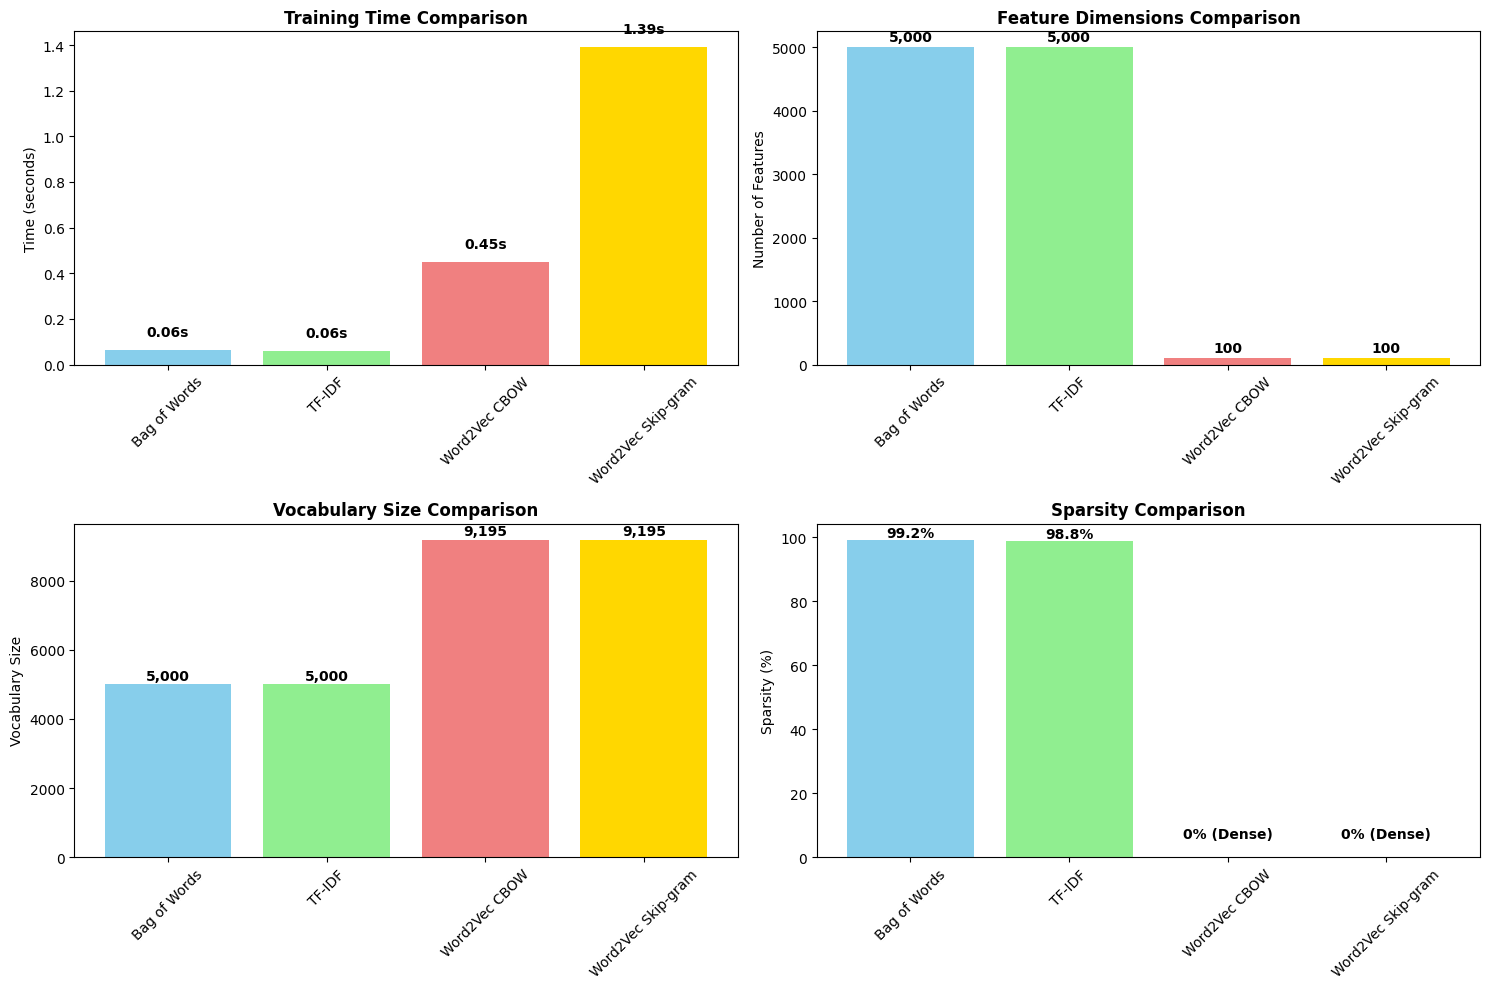

In [29]:
# Visualizing vectorization methods comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Training time comparison
ax1.bar(methods_comparison['Method'], methods_comparison['Training Time (s)'], 
        color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
ax1.set_title('Training Time Comparison', fontweight='bold')
ax1.set_ylabel('Time (seconds)')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(methods_comparison['Training Time (s)']):
    ax1.text(i, v + 0.05, f'{v:.2f}s', ha='center', va='bottom', fontweight='bold')

# Feature dimensions comparison
ax2.bar(methods_comparison['Method'], methods_comparison['Feature Dimensions'], 
        color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
ax2.set_title('Feature Dimensions Comparison', fontweight='bold')
ax2.set_ylabel('Number of Features')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(methods_comparison['Feature Dimensions']):
    ax2.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Vocabulary size comparison
ax3.bar(methods_comparison['Method'], methods_comparison['Vocabulary Size'], 
        color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
ax3.set_title('Vocabulary Size Comparison', fontweight='bold')
ax3.set_ylabel('Vocabulary Size')
ax3.tick_params(axis='x', rotation=45)
for i, v in enumerate(methods_comparison['Vocabulary Size']):
    ax3.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Memory efficiency (sparsity for BoW and TF-IDF, density for Word2Vec)
sparsity_data = ['99.2%', '98.8%', '0% (Dense)', '0% (Dense)']
ax4.bar(methods_comparison['Method'], [99.2, 98.8, 0, 0], 
        color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
ax4.set_title('Sparsity Comparison', fontweight='bold')
ax4.set_ylabel('Sparsity (%)')
ax4.tick_params(axis='x', rotation=45)
for i, v in enumerate(sparsity_data):
    ax4.text(i, [99.2, 98.8, 5, 5][i], v, ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [25]:
# Comparing vectorization methods
print("=== Vectorization Methods Comparison ===")

methods_comparison = {
    'Method': ['Bag of Words', 'TF-IDF', 'Word2Vec CBOW', 'Word2Vec Skip-gram'],
    'Training Time (s)': [bow_time, tfidf_time, cbow_time, skipgram_time],
    'Feature Dimensions': [bow_features.shape[1], tfidf_features.shape[1], 
                          cbow_doc_vectors.shape[1], skipgram_doc_vectors.shape[1]],
    'Vocabulary Size': [len(bow_vectorizer.vocabulary_), len(tfidf_vectorizer.vocabulary_),
                       len(w2v_cbow.wv.key_to_index), len(w2v_skipgram.wv.key_to_index)]
}

for i, method in enumerate(methods_comparison['Method']):
    print(f"\n{method}:")
    print(f"  - Training time: {methods_comparison['Training Time (s)'][i]:.2f} seconds")
    print(f"  - Feature dimensions: {methods_comparison['Feature Dimensions'][i]:,}")
    print(f"  - Vocabulary size: {methods_comparison['Vocabulary Size'][i]:,}")


=== Vectorization Methods Comparison ===

Bag of Words:
  - Training time: 0.06 seconds
  - Feature dimensions: 5,000
  - Vocabulary size: 5,000

TF-IDF:
  - Training time: 0.06 seconds
  - Feature dimensions: 5,000
  - Vocabulary size: 5,000

Word2Vec CBOW:
  - Training time: 0.45 seconds
  - Feature dimensions: 100
  - Vocabulary size: 9,195

Word2Vec Skip-gram:
  - Training time: 1.39 seconds
  - Feature dimensions: 100
  - Vocabulary size: 9,195


In [26]:
# Creating t-SNE visualization for document embeddings comparison
print("Creating t-SNE visualizations for document embeddings...")

# Using a smaller sample for t-SNE (computationally intensive)
sample_size_tsne = 200
sample_indices = np.random.choice(len(tokenized_docs), sample_size_tsne, replace=False)
sample_labels = train_labels[:len(tokenized_docs)][sample_indices]

# Preparing data for t-SNE
bow_sample = bow_features[sample_indices].toarray()
tfidf_sample = tfidf_features[sample_indices].toarray()
cbow_sample = cbow_doc_vectors[sample_indices]
skipgram_sample = skipgram_doc_vectors[sample_indices]

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

print("Computing t-SNE embeddings (this may take a moment)...")
bow_tsne = tsne.fit_transform(bow_sample)
tfidf_tsne = tsne.fit_transform(tfidf_sample)
cbow_tsne = tsne.fit_transform(cbow_sample)
skipgram_tsne = tsne.fit_transform(skipgram_sample)

print("t-SNE computations completed!")


Creating t-SNE visualizations for document embeddings...
Computing t-SNE embeddings (this may take a moment)...
t-SNE computations completed!


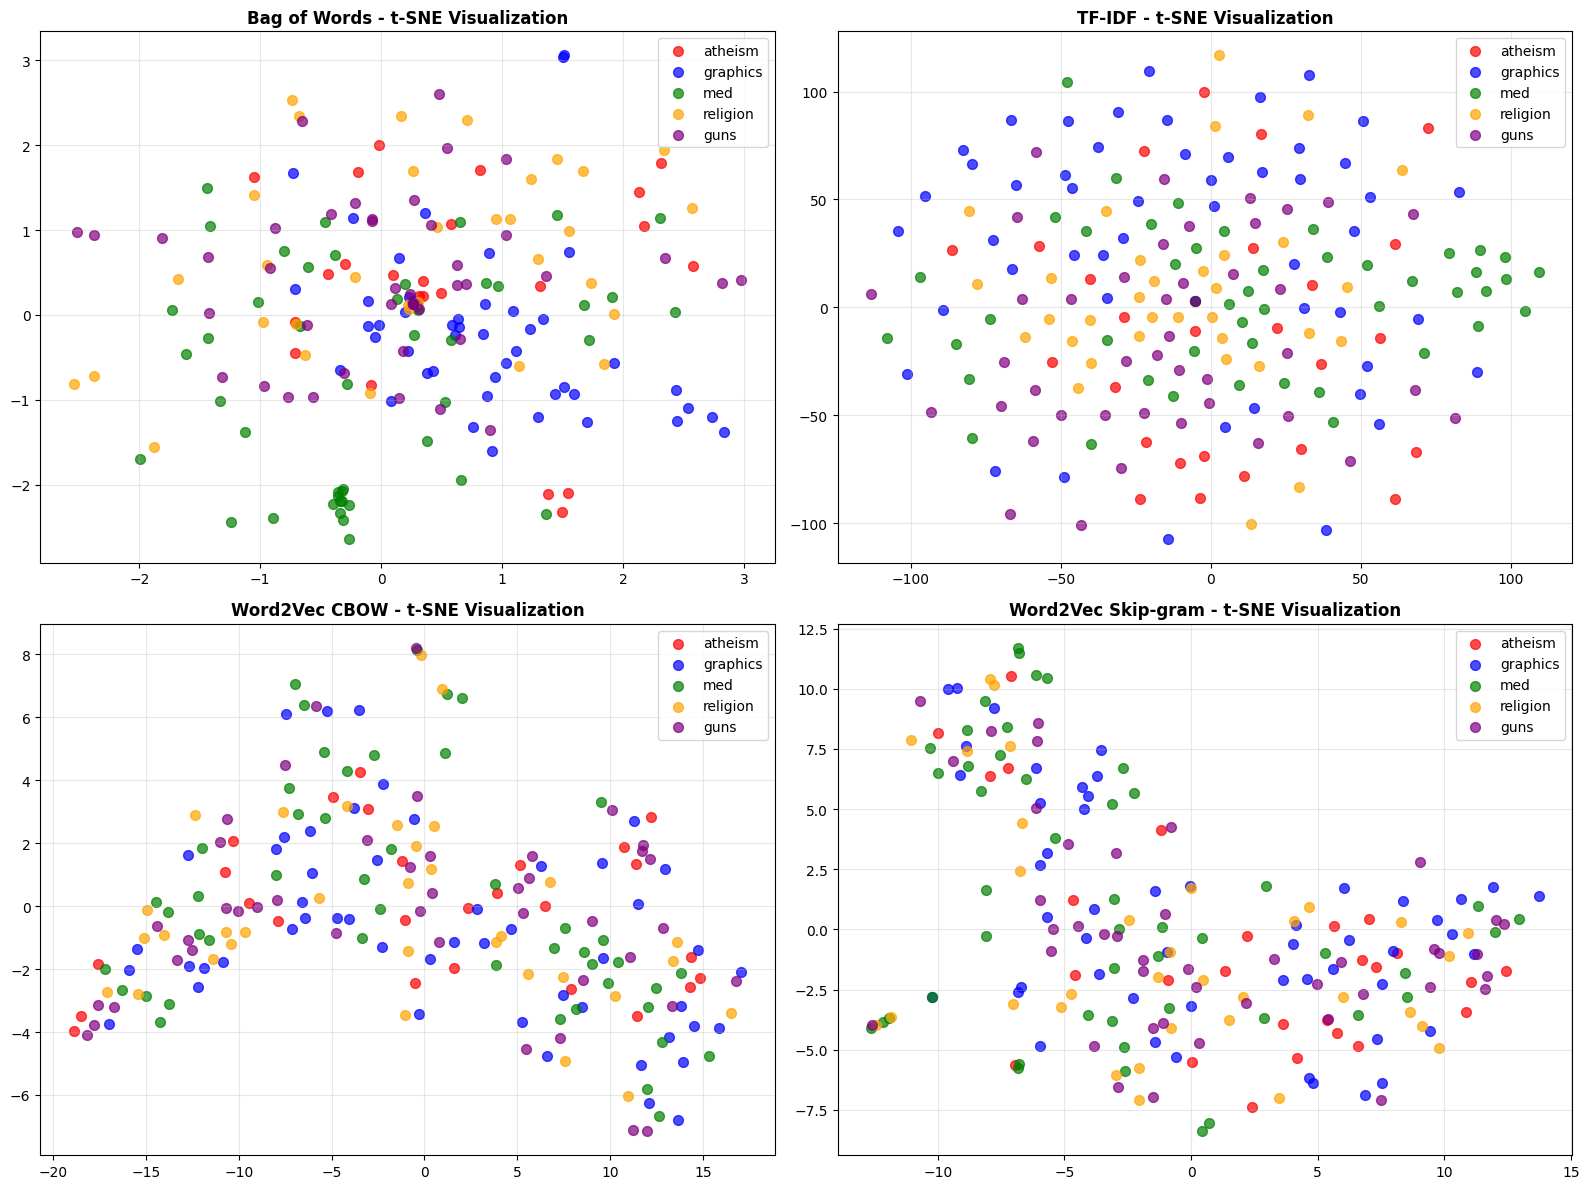

In [30]:
# Plotting t-SNE visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Color mapping for categories
colors = ['red', 'blue', 'green', 'orange', 'purple']
category_names_short = ['atheism', 'graphics', 'med', 'religion', 'guns']

# BoW t-SNE
for i, category in enumerate(category_names_short):
    mask = sample_labels == i
    if np.any(mask):
        ax1.scatter(bow_tsne[mask, 0], bow_tsne[mask, 1], c=colors[i], 
                   label=category, alpha=0.7, s=50)
ax1.set_title('Bag of Words - t-SNE Visualization', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# TF-IDF t-SNE
for i, category in enumerate(category_names_short):
    mask = sample_labels == i
    if np.any(mask):
        ax2.scatter(tfidf_tsne[mask, 0], tfidf_tsne[mask, 1], c=colors[i], 
                   label=category, alpha=0.7, s=50)
ax2.set_title('TF-IDF - t-SNE Visualization', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# CBOW t-SNE
for i, category in enumerate(category_names_short):
    mask = sample_labels == i
    if np.any(mask):
        ax3.scatter(cbow_tsne[mask, 0], cbow_tsne[mask, 1], c=colors[i], 
                   label=category, alpha=0.7, s=50)
ax3.set_title('Word2Vec CBOW - t-SNE Visualization', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Skip-gram t-SNE
for i, category in enumerate(category_names_short):
    mask = sample_labels == i
    if np.any(mask):
        ax4.scatter(skipgram_tsne[mask, 0], skipgram_tsne[mask, 1], c=colors[i], 
                   label=category, alpha=0.7, s=50)
ax4.set_title('Word2Vec Skip-gram - t-SNE Visualization', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Part 4: Classification

We will train and evaluate Logistic Regression and Simple LSTM models using each vectorization method to compare their performance on the news classification task.


In [ ]:
# Importing libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Setting random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Classification libraries imported successfully!")


Classification libraries imported successfully!


In [32]:
# Preparing test data with same preprocessing
test_size = 500  # Using subset for efficiency
test_docs = newsgroups_test.data[:test_size]
test_labels = newsgroups_test.target[:test_size]

# Preprocessing test documents
test_docs_basic = prepare_text_for_vectorization(test_docs, use_advanced=False)
test_tokenized = []
for doc in test_docs:
    tokens = basic_preprocessing(doc)
    if len(tokens) > 0:
        test_tokenized.append(tokens)

# Transforming test data using fitted vectorizers
bow_test = bow_vectorizer.transform(test_docs_basic[:len(test_tokenized)])
tfidf_test = tfidf_vectorizer.transform(test_docs_basic[:len(test_tokenized)])

# Creating Word2Vec test document vectors
cbow_test_vectors = np.array([get_document_vector(w2v_cbow, tokens) for tokens in test_tokenized])
skipgram_test_vectors = np.array([get_document_vector(w2v_skipgram, tokens) for tokens in test_tokenized])

# Adjusting labels to match the processed data length
train_labels_adj = train_labels[:len(tokenized_docs)]
test_labels_adj = test_labels[:len(test_tokenized)]

print(f"Prepared test data with {len(test_tokenized)} documents")


Prepared test data with 484 documents


In [33]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name, vectorization_method):
    """
    Evaluating model performance and returning metrics
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"\n{model_name} with {vectorization_method}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    return {
        'model': model_name,
        'vectorization': vectorization_method,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

print("Evaluation function defined successfully!")


Evaluation function defined successfully!


In [35]:
# Training Logistic Regression models
print("=== Training Logistic Regression Models ===")

results = []

# Ensuring consistent sample sizes by filtering out empty documents
valid_indices = [i for i, tokens in enumerate(tokenized_docs) if len(tokens) > 0]
bow_features_filtered = bow_features[valid_indices]
train_labels_filtered = np.array(train_labels_adj)[valid_indices]

print(f"Using {len(valid_indices)} valid documents out of {len(tokenized_docs)} total documents")

# Logistic Regression with Bag of Words
print("Training Logistic Regression with BoW...")
lr_bow = LogisticRegression(max_iter=1000, random_state=42)
lr_bow.fit(bow_features_filtered, train_labels_filtered)
bow_pred = lr_bow.predict(bow_test)
results.append(evaluate_model(test_labels_adj, bow_pred, "Logistic Regression", "Bag of Words"))

print("Training completed!")

=== Training Logistic Regression Models ===
Using 973 valid documents out of 973 total documents
Training Logistic Regression with BoW...

Logistic Regression with Bag of Words:
  Accuracy:  0.6777
  Precision: 0.7012
  Recall:    0.6777
  F1-Score:  0.6815
Training completed!


In [37]:
# Logistic Regression with TF-IDF
print("Training Logistic Regression with TF-IDF...")
tfidf_features_filtered = tfidf_features[valid_indices]
lr_tfidf = LogisticRegression(max_iter=1000, random_state=42)
lr_tfidf.fit(tfidf_features_filtered, train_labels_filtered)
tfidf_pred = lr_tfidf.predict(tfidf_test)
results.append(evaluate_model(test_labels_adj, tfidf_pred, "Logistic Regression", "TF-IDF"))

print("Training completed!")

Training Logistic Regression with TF-IDF...

Logistic Regression with TF-IDF:
  Accuracy:  0.7500
  Precision: 0.7628
  Recall:    0.7500
  F1-Score:  0.7397
Training completed!


In [38]:
# Logistic Regression with Word2Vec CBOW
print("Training Logistic Regression with Word2Vec CBOW...")
lr_cbow = LogisticRegression(max_iter=1000, random_state=42)
lr_cbow.fit(cbow_doc_vectors, train_labels_adj)
cbow_pred = lr_cbow.predict(cbow_test_vectors)
results.append(evaluate_model(test_labels_adj, cbow_pred, "Logistic Regression", "Word2Vec CBOW"))

print("Training completed!")


Training Logistic Regression with Word2Vec CBOW...

Logistic Regression with Word2Vec CBOW:
  Accuracy:  0.1860
  Precision: 0.1299
  Recall:    0.1860
  F1-Score:  0.1376
Training completed!


In [39]:
# Logistic Regression with Word2Vec Skip-gram
print("Training Logistic Regression with Word2Vec Skip-gram...")
lr_skipgram = LogisticRegression(max_iter=1000, random_state=42)
lr_skipgram.fit(skipgram_doc_vectors, train_labels_adj)
skipgram_pred = lr_skipgram.predict(skipgram_test_vectors)
results.append(evaluate_model(test_labels_adj, skipgram_pred, "Logistic Regression", "Word2Vec Skip-gram"))

print("Training completed!")


Training Logistic Regression with Word2Vec Skip-gram...

Logistic Regression with Word2Vec Skip-gram:
  Accuracy:  0.1983
  Precision: 0.1650
  Recall:    0.1983
  F1-Score:  0.1605
Training completed!


In [40]:
# Creating simple LSTM model function
def create_simple_lstm(input_dim, num_classes):
    """
    Creating a simple LSTM model for text classification
    """
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

print("LSTM model function defined successfully!")


LSTM model function defined successfully!


In [41]:
# Training Simple LSTM models
print("=== Training Simple LSTM Models ===")

# Converting labels to categorical for neural networks
num_classes = len(np.unique(train_labels_adj))
train_labels_cat = to_categorical(train_labels_adj, num_classes)
test_labels_cat = to_categorical(test_labels_adj, num_classes)

print(f"Number of classes: {num_classes}")
print("Labels converted to categorical format")


=== Training Simple LSTM Models ===
Number of classes: 5
Labels converted to categorical format


In [43]:
# LSTM with Bag of Words
print("Training Simple LSTM with BoW...")
lstm_bow = create_simple_lstm(bow_features_filtered.shape[1], num_classes)

# Filter the categorical labels to match the filtered features
train_labels_cat_filtered = train_labels_cat[valid_indices]

lstm_bow.fit(bow_features_filtered.toarray(), train_labels_cat_filtered, 
             epochs=10, batch_size=32, verbose=0, validation_split=0.1)

bow_lstm_pred = lstm_bow.predict(bow_test.toarray(), verbose=0)
bow_lstm_pred_classes = np.argmax(bow_lstm_pred, axis=1)
results.append(evaluate_model(test_labels_adj, bow_lstm_pred_classes, "Simple LSTM", "Bag of Words"))

print("Training completed!")

Training Simple LSTM with BoW...

Simple LSTM with Bag of Words:
  Accuracy:  0.7376
  Precision: 0.7498
  Recall:    0.7376
  F1-Score:  0.7399
Training completed!


In [45]:
# LSTM with TF-IDF
print("Training Simple LSTM with TF-IDF...")
lstm_tfidf = create_simple_lstm(tfidf_features_filtered.shape[1], num_classes)
lstm_tfidf.fit(tfidf_features_filtered.toarray(), train_labels_cat_filtered, 
               epochs=10, batch_size=32, verbose=0, validation_split=0.1)

tfidf_lstm_pred = lstm_tfidf.predict(tfidf_test.toarray(), verbose=0)
tfidf_lstm_pred_classes = np.argmax(tfidf_lstm_pred, axis=1)
results.append(evaluate_model(test_labels_adj, tfidf_lstm_pred_classes, "Simple LSTM", "TF-IDF"))

print("Training completed!")

Training Simple LSTM with TF-IDF...

Simple LSTM with TF-IDF:
  Accuracy:  0.7541
  Precision: 0.7555
  Recall:    0.7541
  F1-Score:  0.7482
Training completed!


In [46]:
# LSTM with Word2Vec CBOW
print("Training Simple LSTM with Word2Vec CBOW...")
lstm_cbow = create_simple_lstm(cbow_doc_vectors.shape[1], num_classes)
lstm_cbow.fit(cbow_doc_vectors, train_labels_cat, 
              epochs=10, batch_size=32, verbose=0, validation_split=0.1)

cbow_lstm_pred = lstm_cbow.predict(cbow_test_vectors, verbose=0)
cbow_lstm_pred_classes = np.argmax(cbow_lstm_pred, axis=1)
results.append(evaluate_model(test_labels_adj, cbow_lstm_pred_classes, "Simple LSTM", "Word2Vec CBOW"))

print("Training completed!")


Training Simple LSTM with Word2Vec CBOW...

Simple LSTM with Word2Vec CBOW:
  Accuracy:  0.1756
  Precision: 0.0313
  Recall:    0.1756
  F1-Score:  0.0532
Training completed!


In [47]:
# LSTM with Word2Vec Skip-gram
print("Training Simple LSTM with Word2Vec Skip-gram...")
lstm_skipgram = create_simple_lstm(skipgram_doc_vectors.shape[1], num_classes)
lstm_skipgram.fit(skipgram_doc_vectors, train_labels_cat, 
                  epochs=10, batch_size=32, verbose=0, validation_split=0.1)

skipgram_lstm_pred = lstm_skipgram.predict(skipgram_test_vectors, verbose=0)
skipgram_lstm_pred_classes = np.argmax(skipgram_lstm_pred, axis=1)
results.append(evaluate_model(test_labels_adj, skipgram_lstm_pred_classes, "Simple LSTM", "Word2Vec Skip-gram"))

print("Training completed!")


Training Simple LSTM with Word2Vec Skip-gram...

Simple LSTM with Word2Vec Skip-gram:
  Accuracy:  0.2004
  Precision: 0.1160
  Recall:    0.2004
  F1-Score:  0.1290
Training completed!


In [48]:
# Creating comprehensive results summary
print("=== Complete Classification Results Summary ===")

# Converting results to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results)

print("\nDetailed Results:")
for i, result in enumerate(results):
    print(f"\n{i+1}. {result['model']} + {result['vectorization']}:")
    print(f"   Accuracy: {result['accuracy']:.4f}")
    print(f"   Precision: {result['precision']:.4f}")
    print(f"   Recall: {result['recall']:.4f}")
    print(f"   F1-Score: {result['f1_score']:.4f}")

print(f"\nTotal combinations evaluated: {len(results)}")


=== Complete Classification Results Summary ===

Detailed Results:

1. Logistic Regression + Bag of Words:
   Accuracy: 0.6777
   Precision: 0.7012
   Recall: 0.6777
   F1-Score: 0.6815

2. Logistic Regression + TF-IDF:
   Accuracy: 0.7500
   Precision: 0.7628
   Recall: 0.7500
   F1-Score: 0.7397

3. Logistic Regression + Word2Vec CBOW:
   Accuracy: 0.1860
   Precision: 0.1299
   Recall: 0.1860
   F1-Score: 0.1376

4. Logistic Regression + Word2Vec Skip-gram:
   Accuracy: 0.1983
   Precision: 0.1650
   Recall: 0.1983
   F1-Score: 0.1605

5. Simple LSTM + Bag of Words:
   Accuracy: 0.7376
   Precision: 0.7498
   Recall: 0.7376
   F1-Score: 0.7399

6. Simple LSTM + TF-IDF:
   Accuracy: 0.7541
   Precision: 0.7555
   Recall: 0.7541
   F1-Score: 0.7482

7. Simple LSTM + Word2Vec CBOW:
   Accuracy: 0.1756
   Precision: 0.0313
   Recall: 0.1756
   F1-Score: 0.0532

8. Simple LSTM + Word2Vec Skip-gram:
   Accuracy: 0.2004
   Precision: 0.1160
   Recall: 0.2004
   F1-Score: 0.1290

Total comb

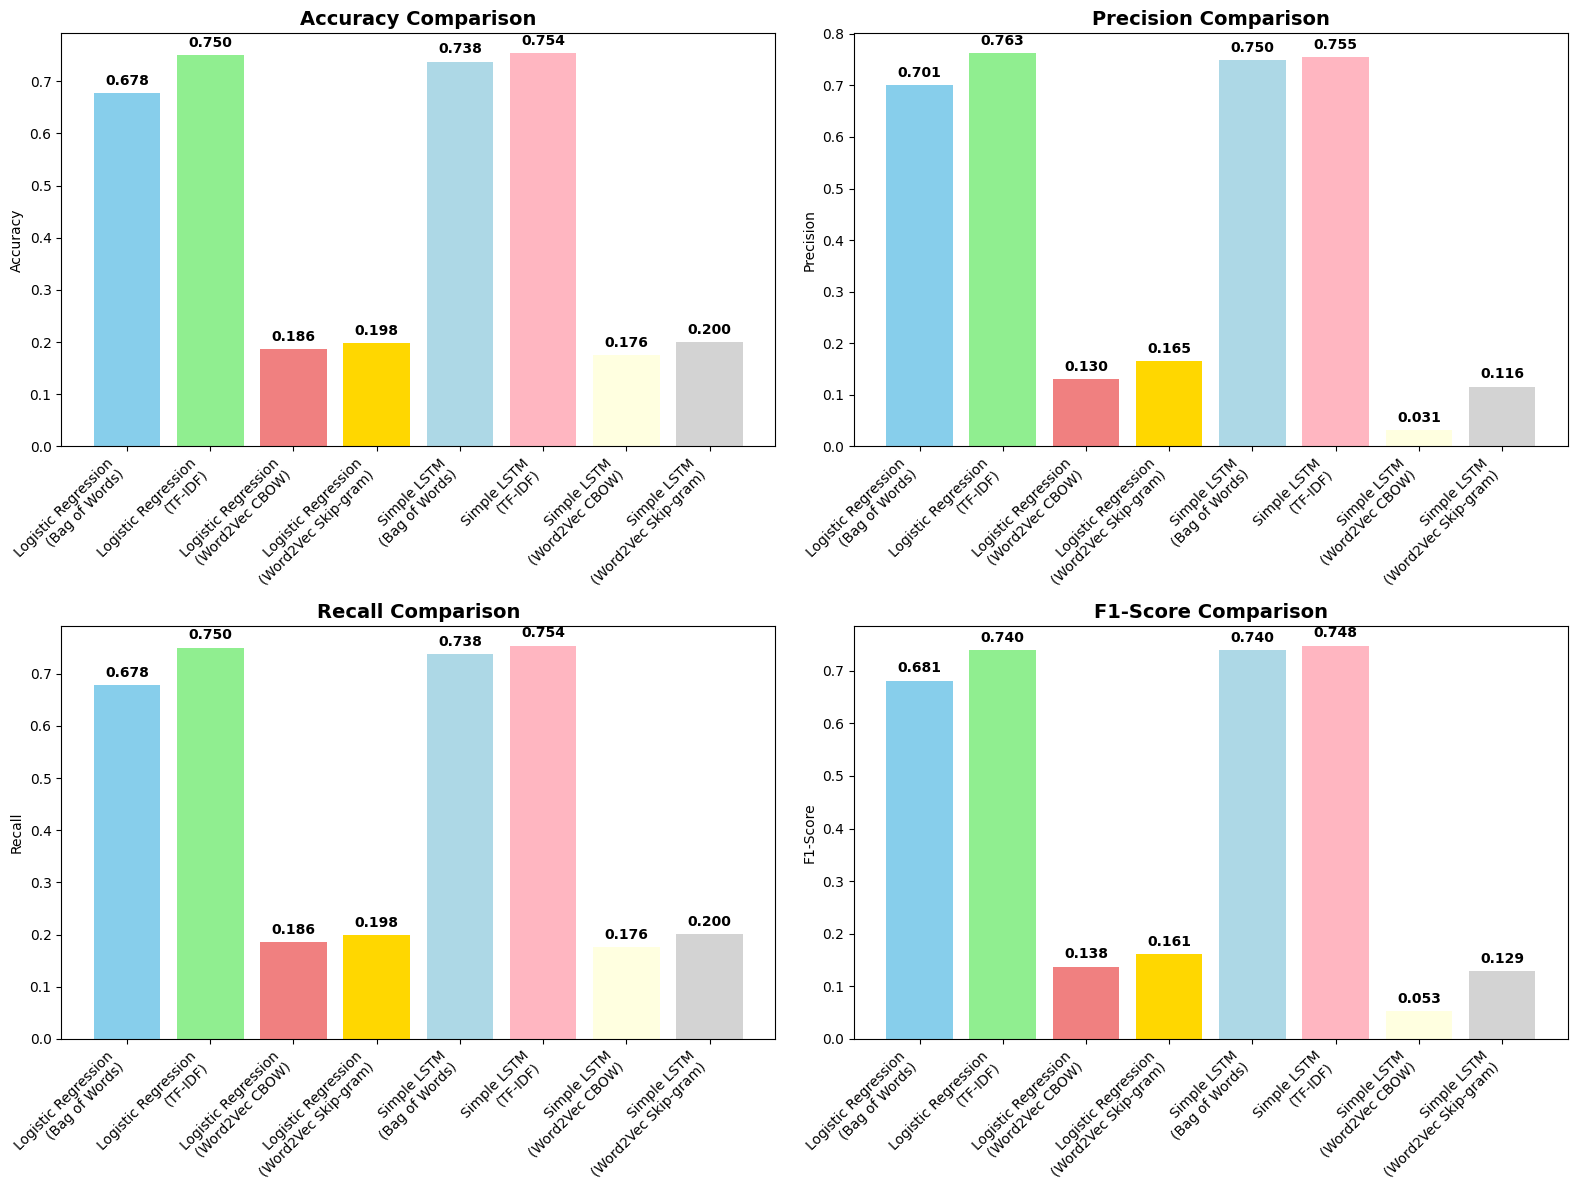

In [49]:
# Creating comprehensive visualization of results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Preparing data for plotting
models = [r['model'] for r in results]
vectorizations = [r['vectorization'] for r in results]
accuracies = [r['accuracy'] for r in results]
precisions = [r['precision'] for r in results]
recalls = [r['recall'] for r in results]
f1_scores = [r['f1_score'] for r in results]

# Creating labels for x-axis
labels = [f"{m}\n({v})" for m, v in zip(models, vectorizations)]
x_pos = np.arange(len(labels))

# Accuracy comparison
bars1 = ax1.bar(x_pos, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 
                                          'lightblue', 'lightpink', 'lightyellow', 'lightgray'])
ax1.set_title('Accuracy Comparison', fontweight='bold', fontsize=14)
ax1.set_ylabel('Accuracy')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Precision comparison
bars2 = ax2.bar(x_pos, precisions, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 
                                          'lightblue', 'lightpink', 'lightyellow', 'lightgray'])
ax2.set_title('Precision Comparison', fontweight='bold', fontsize=14)
ax2.set_ylabel('Precision')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
for i, v in enumerate(precisions):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Recall comparison
bars3 = ax3.bar(x_pos, recalls, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 
                                       'lightblue', 'lightpink', 'lightyellow', 'lightgray'])
ax3.set_title('Recall Comparison', fontweight='bold', fontsize=14)
ax3.set_ylabel('Recall')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
for i, v in enumerate(recalls):
    ax3.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# F1-Score comparison
bars4 = ax4.bar(x_pos, f1_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 
                                         'lightblue', 'lightpink', 'lightyellow', 'lightgray'])
ax4.set_title('F1-Score Comparison', fontweight='bold', fontsize=14)
ax4.set_ylabel('F1-Score')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
for i, v in enumerate(f1_scores):
    ax4.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [52]:
# Finding and displaying the best performing combinations
print("=== Best Performing Model Combinations ===")

# Finding best performance for each metric
best_accuracy = max(results, key=lambda x: x['accuracy'])
best_precision = max(results, key=lambda x: x['precision'])
best_recall = max(results, key=lambda x: x['recall'])
best_f1 = max(results, key=lambda x: x['f1_score'])

print(f"\nBest Accuracy: {best_accuracy['accuracy']:.4f}")
print(f"  Model: {best_accuracy['model']} + {best_accuracy['vectorization']}")

print(f"\nBest Precision: {best_precision['precision']:.4f}")
print(f"  Model: {best_precision['model']} + {best_precision['vectorization']}")

print(f"\nBest Recall: {best_recall['recall']:.4f}")
print(f"  Model: {best_recall['model']} + {best_recall['vectorization']}")

print(f"\nBest F1-Score: {best_f1['f1_score']:.4f}")
print(f"  Model: {best_f1['model']} + {best_f1['vectorization']}")

# Overall best performer (based on F1-score)
print(f"\nOverall Best Performer (F1-Score): {best_f1['model']} + {best_f1['vectorization']}")
print(f"   All metrics - Accuracy: {best_f1['accuracy']:.4f}, Precision: {best_f1['precision']:.4f}, Recall: {best_f1['recall']:.4f}, F1: {best_f1['f1_score']:.4f}")


=== Best Performing Model Combinations ===

Best Accuracy: 0.7541
  Model: Simple LSTM + TF-IDF

Best Precision: 0.7628
  Model: Logistic Regression + TF-IDF

Best Recall: 0.7541
  Model: Simple LSTM + TF-IDF

Best F1-Score: 0.7482
  Model: Simple LSTM + TF-IDF

Overall Best Performer (F1-Score): Simple LSTM + TF-IDF
   All metrics - Accuracy: 0.7541, Precision: 0.7555, Recall: 0.7541, F1: 0.7482


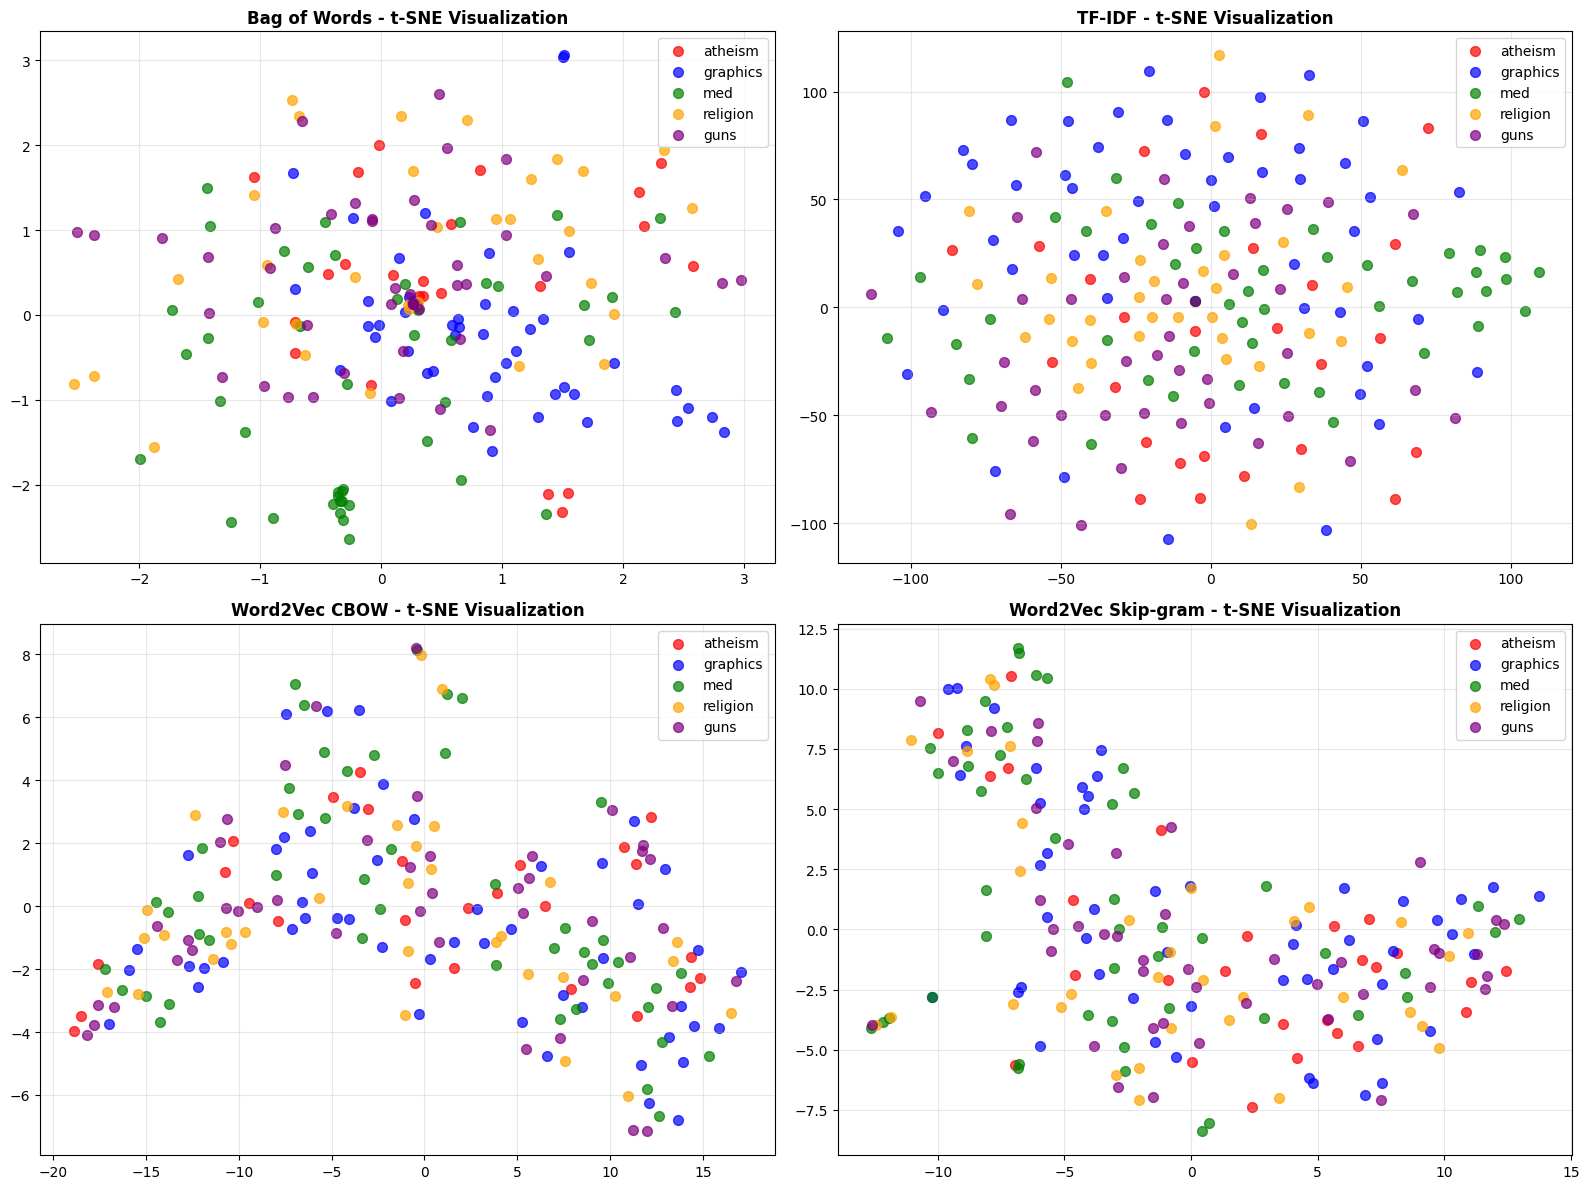

In [51]:
# Plotting t-SNE visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Color mapping for categories
colors = ['red', 'blue', 'green', 'orange', 'purple']
category_names_short = ['atheism', 'graphics', 'med', 'religion', 'guns']

# BoW t-SNE
for i, category in enumerate(category_names_short):
    mask = sample_labels == i
    if np.any(mask):
        ax1.scatter(bow_tsne[mask, 0], bow_tsne[mask, 1], c=colors[i], 
                   label=category, alpha=0.7, s=50)
ax1.set_title('Bag of Words - t-SNE Visualization', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# TF-IDF t-SNE
for i, category in enumerate(category_names_short):
    mask = sample_labels == i
    if np.any(mask):
        ax2.scatter(tfidf_tsne[mask, 0], tfidf_tsne[mask, 1], c=colors[i], 
                   label=category, alpha=0.7, s=50)
ax2.set_title('TF-IDF - t-SNE Visualization', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# CBOW t-SNE
for i, category in enumerate(category_names_short):
    mask = sample_labels == i
    if np.any(mask):
        ax3.scatter(cbow_tsne[mask, 0], cbow_tsne[mask, 1], c=colors[i], 
                   label=category, alpha=0.7, s=50)
ax3.set_title('Word2Vec CBOW - t-SNE Visualization', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Skip-gram t-SNE
for i, category in enumerate(category_names_short):
    mask = sample_labels == i
    if np.any(mask):
        ax4.scatter(skipgram_tsne[mask, 0], skipgram_tsne[mask, 1], c=colors[i], 
                   label=category, alpha=0.7, s=50)
ax4.set_title('Word2Vec Skip-gram - t-SNE Visualization', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


***Note:*** Some implmentation ideas were suggested by AI and some bugs in the code were fixed using AI.